In [153]:
# Overview: In this project we predicted the magnitude of the earthquake around the world by the Machine learning approach
# Only Supervised learnings were applied
# Importing the necessary package for importing the data and EDA (Exploratory Data Analyis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [108]:
# This fyction read the data as the pandas dataframe object
def load_data(data_path):
    
    
    try:
        # engine = 'python', this option used to read byte like object, so that no error will be raise, if the dataset isn't UTF-8
        data = pd.read_csv(data_path, engine = 'python')
        
    except:
        data = pd.read_csv(data_path)
    
    return data

In [109]:
# Create a dorectory to place all the graph
    
if os.path.exists('output')==False:
    os.mkdir('output')
else:
    print('directory is already existed')

directory is already existed


In [110]:
data = load_data("database.csv")
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [111]:
# The list of column name
columns = [i for i in data.columns]
columns


['Date',
 'Time',
 'Latitude',
 'Longitude',
 'Type',
 'Depth',
 'Depth Error',
 'Depth Seismic Stations',
 'Magnitude',
 'Magnitude Type',
 'Magnitude Error',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Horizontal Distance',
 'Horizontal Error',
 'Root Mean Square',
 'ID',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [112]:
col = columns[16:]
col


['ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']

In [113]:
# EDA-1: 1st step of EDA: Removing irrelevant data columns
df = data.drop(col, axis = 1)
df = df.drop('Magnitude Type', axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,0.320,18.0,42.47,0.120,NaN,0.1898
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,0.260,18.0,48.58,0.129,NaN,0.2187
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,NaN,NaN,91.00,0.992,4.8,1.5200
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,NaN,NaN,26.00,3.553,6.0,1.4300


In [114]:
df[df['Type']!= 'Earthquake']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
565,12/20/1966,15:30:01,37.302167,-116.408333,Nuclear Explosion,1.2,31.61,16.0,5.62,0.245,10.0,261.0,1.476,99.0,0.86
897,04/26/1968,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.2,31.61,17.0,5.63,0.125,6.0,261.0,1.438,99.0,1.03
1129,12/19/1968,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.4,31.61,16.0,5.52,0.219,6.0,257.0,1.415,99.0,1.36
1380,09/16/1969,14:30:01,37.314167,-116.460667,Nuclear Explosion,1.2,31.61,13.0,5.82,0.187,8.0,268.0,1.437,99.0,0.33
1532,03/26/1970,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.2,31.61,16.0,5.54,0.410,10.0,260.0,1.377,99.0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,10/07/1994,03:25:58,41.662000,88.753000,Nuclear Explosion,0.0,NaN,NaN,6.00,NaN,138.0,NaN,NaN,NaN,0.90
12450,05/15/1995,04:05:58,41.603000,88.820000,Nuclear Explosion,0.0,NaN,NaN,6.10,NaN,175.0,NaN,NaN,NaN,1.00
12613,08/17/1995,00:59:58,41.559000,88.800000,Nuclear Explosion,0.0,NaN,NaN,6.00,NaN,166.0,NaN,NaN,NaN,0.90
13054,06/08/1996,02:55:58,41.657000,88.690000,Nuclear Explosion,0.0,NaN,NaN,5.90,NaN,178.0,NaN,NaN,NaN,0.90


In [115]:
# EDA-2: 2nd step of EDA: values in text format is converting into numerical value


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dtA = df["Type"]
df["Type"] = encoder.fit_transform(dtA)
dtB = df["Date"]
df['Date'] = encoder.fit_transform(dtB)
dtC = df["Time"]
df['Time'] = encoder.fit_transform(dtC)


# Other text value found in the base dataset has the alternative numerucal value, so this operation  isn't necessary for other text value
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,34,11784,19.2460,145.6160,0,131.60,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101,9865,1.8630,127.3520,0,80.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
2,133,15447,-20.5790,-173.9720,0,20.00,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN
3,235,16087,-59.0760,-23.5570,0,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
4,267,11611,11.9380,126.4270,0,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12298,7200,38.3917,-118.8941,0,12.30,1.2,40.0,5.6,0.320,18.0,42.47,0.120,NaN,0.1898
23408,12298,7904,38.3777,-118.8957,0,8.80,2.0,33.0,5.5,0.260,18.0,48.58,0.129,NaN,0.2187
23409,12298,10831,36.9179,140.4262,0,10.00,1.8,NaN,5.9,NaN,NaN,91.00,0.992,4.8,1.5200
23410,12333,19200,-9.0283,118.6639,0,79.00,1.8,NaN,6.3,NaN,NaN,26.00,3.553,6.0,1.4300


In [116]:
DF = df.fillna(0)
DF

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,34,11784,19.2460,145.6160,0,131.60,0.0,0.0,6.0,0.000,0.0,0.00,0.000,0.0,0.0000
1,101,9865,1.8630,127.3520,0,80.00,0.0,0.0,5.8,0.000,0.0,0.00,0.000,0.0,0.0000
2,133,15447,-20.5790,-173.9720,0,20.00,0.0,0.0,6.2,0.000,0.0,0.00,0.000,0.0,0.0000
3,235,16087,-59.0760,-23.5570,0,15.00,0.0,0.0,5.8,0.000,0.0,0.00,0.000,0.0,0.0000
4,267,11611,11.9380,126.4270,0,15.00,0.0,0.0,5.8,0.000,0.0,0.00,0.000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12298,7200,38.3917,-118.8941,0,12.30,1.2,40.0,5.6,0.320,18.0,42.47,0.120,0.0,0.1898
23408,12298,7904,38.3777,-118.8957,0,8.80,2.0,33.0,5.5,0.260,18.0,48.58,0.129,0.0,0.2187
23409,12298,10831,36.9179,140.4262,0,10.00,1.8,0.0,5.9,0.000,0.0,91.00,0.992,4.8,1.5200
23410,12333,19200,-9.0283,118.6639,0,79.00,1.8,0.0,6.3,0.000,0.0,26.00,3.553,6.0,1.4300


In [117]:
# EDA-3: Correlation matrix
corr_matrix =  DF.corr()

# Corrrelation among number of wounded and all other variables
n = corr_matrix['Magnitude'].sort_values(ascending=False)


In [118]:
n

Magnitude                     1.000000
Depth Seismic Stations        0.131969
Longitude                     0.038579
Latitude                      0.034987
Depth                         0.023457
Time                          0.004417
Date                          0.000673
Root Mean Square             -0.003463
Type                         -0.005996
Horizontal Error             -0.009213
Horizontal Distance          -0.014047
Magnitude Error              -0.053622
Magnitude Seismic Stations   -0.077652
Depth Error                  -0.086587
Azimuthal Gap                -0.088786
Name: Magnitude, dtype: float64

In [119]:
drop = ['Time','Date','Root Mean Square', 'Type', 'Horizontal Error', 'Horizontal Distance']

DF = DF.drop(drop, axis=1)
DF

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap
0,19.2460,145.6160,131.60,0.0,0.0,6.0,0.000,0.0,0.00
1,1.8630,127.3520,80.00,0.0,0.0,5.8,0.000,0.0,0.00
2,-20.5790,-173.9720,20.00,0.0,0.0,6.2,0.000,0.0,0.00
3,-59.0760,-23.5570,15.00,0.0,0.0,5.8,0.000,0.0,0.00
4,11.9380,126.4270,15.00,0.0,0.0,5.8,0.000,0.0,0.00
...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,1.2,40.0,5.6,0.320,18.0,42.47
23408,38.3777,-118.8957,8.80,2.0,33.0,5.5,0.260,18.0,48.58
23409,36.9179,140.4262,10.00,1.8,0.0,5.9,0.000,0.0,91.00
23410,-9.0283,118.6639,79.00,1.8,0.0,6.3,0.000,0.0,26.00


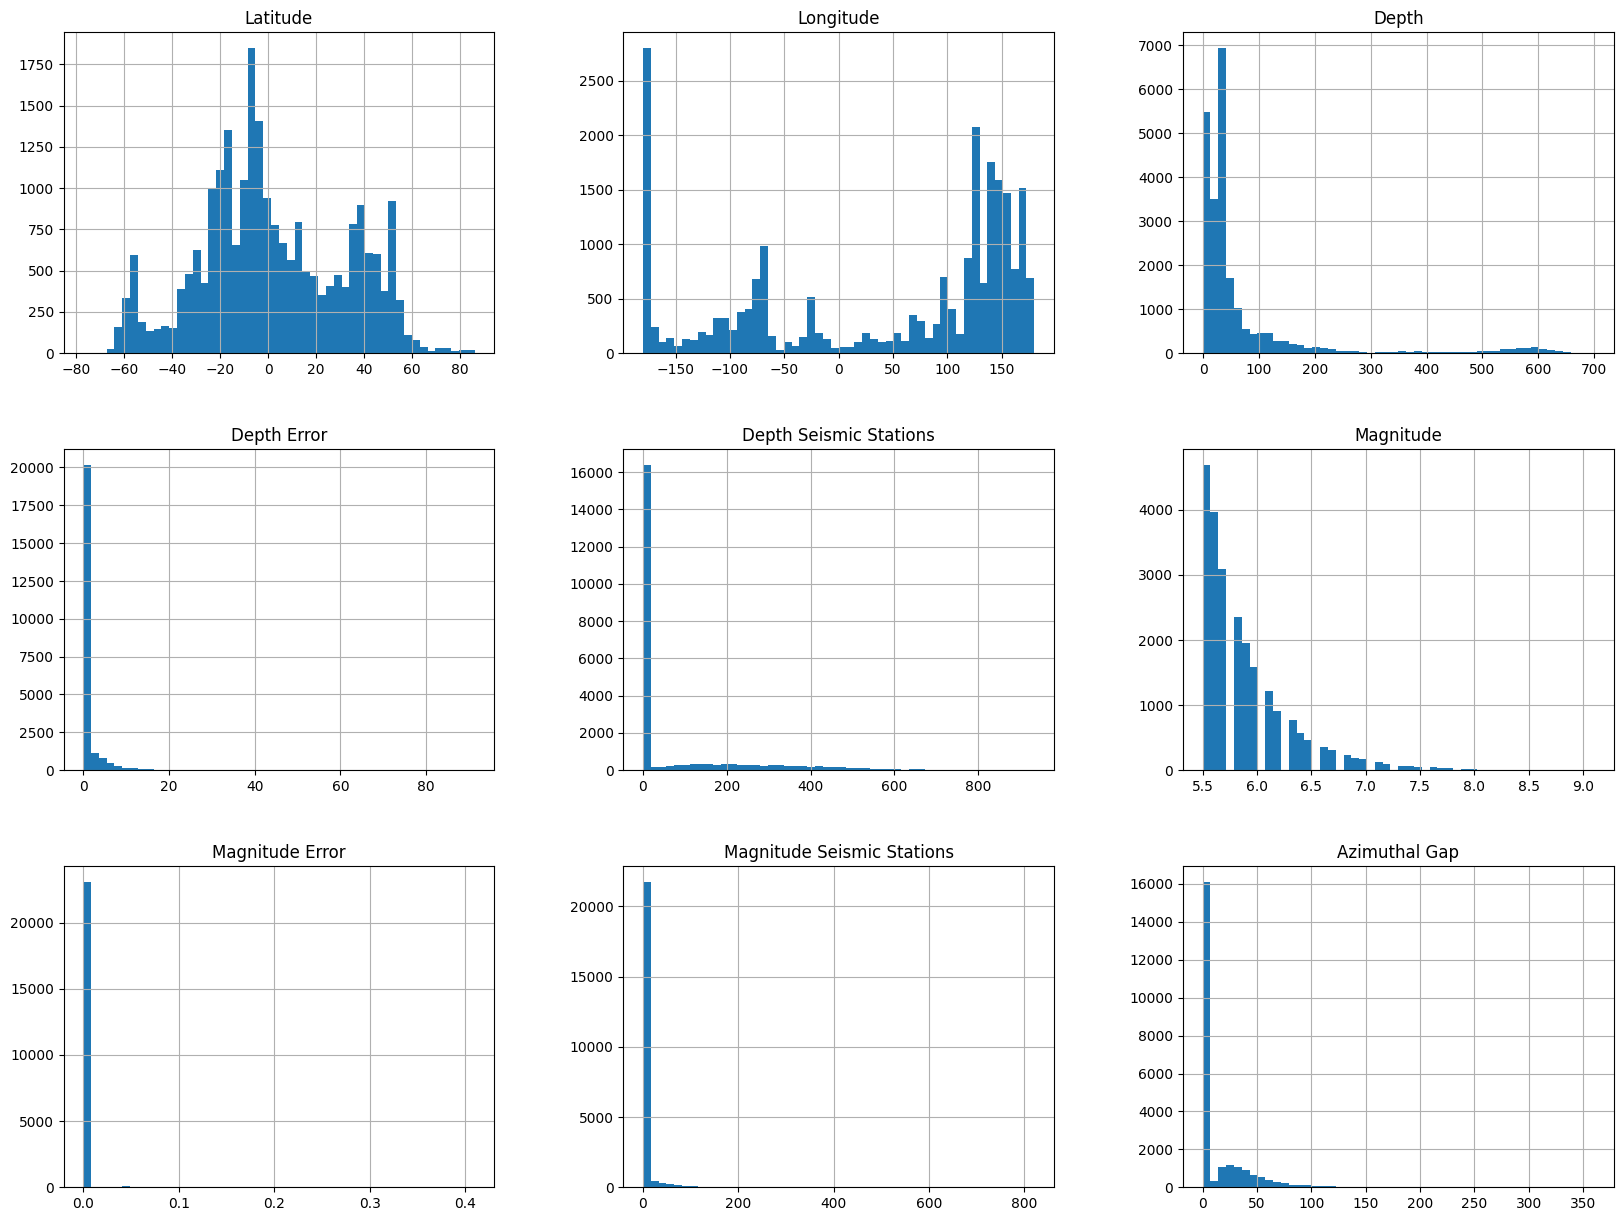

In [121]:
# EDA-4: Histogtram plot through the differet parts (eg., percentile) of the data-column
DF.hist(bins = 50, figsize = (20,15))

plt.savefig("output/histogram_EDA_all_column.png")
plt.show()

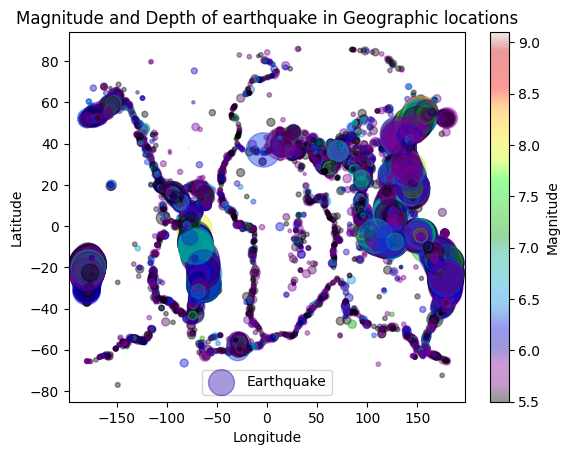

In [17]:
# EDA-5: Scatter plot of temperature and number of kill in geographic locations

DF.plot(kind = "scatter", x = 'Longitude', y="Latitude", alpha=0.4,c= "Magnitude", 
        label="Earthquake",s="Depth", cmap=plt.get_cmap("nipy_spectral"), colorbar=True)


# The size of circle is corresponded with the number of kills by the terrorist attack
# The color is corresponded to the value of temperature
plt.legend()
plt.title("Magnitude and Depth of earthquake in Geographic locations")
plt.savefig("output/Magnitude_and_Depth_of_earthquake_in_Geographic_locations.png")
plt.show()

In [122]:
# starting the actual ML, EDA has finished


# The base dataset is splitting into test and strain onto a random basis
from sklearn.model_selection import train_test_split

# Separating the target variable from the base data
X = DF.drop('Magnitude', axis = 1)
y = DF['Magnitude']

# Train size = 75%
# Random_state =  42, so that, the randomized data will not change if run again
train, test, target_train,target_test  = train_test_split(X,y,test_size=0.25, random_state=42)

In [123]:
train

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap
19517,-17.761,167.857,15.0,9.2,134.0,0.0,0.0,78.4
15538,14.995,-91.571,161.1,0.0,299.0,0.0,0.0,0.0
9926,42.540,144.048,71.5,0.0,0.0,0.0,0.0,0.0
6750,44.229,130.741,557.9,2.1,0.0,0.0,0.0,0.0
16780,21.949,121.604,26.4,10.3,320.0,0.0,0.0,35.7
...,...,...,...,...,...,...,...,...
11964,27.995,140.700,28.2,0.0,0.0,0.0,0.0,0.0
21575,-10.682,166.381,10.0,0.0,346.0,0.0,0.0,32.3
5390,-6.847,129.634,131.0,0.0,0.0,0.0,0.0,0.0
860,-5.469,153.269,30.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Defining the ML algorithm: Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_features = 5, random_state = 0, n_estimators = 100)

In [125]:
# Fitting the train and target train into random forest regressor
fit = clf.fit(train, target_train)

# Prediction with the test sat
pred = clf.predict(test)
pred

array([5.883, 5.589, 5.722, ..., 5.888, 6.253, 5.858])

In [126]:
# The score for random forest regressor

score_random_forest = clf.score(test,target_test)
score_random_forest

0.0900072417493003

In [127]:
# root mean square score for random forest regressor
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_test, pred)

random_forest_rmse = np.sqrt(mse)

random_forest_rmse

0.40676122451840524

In [128]:
mse

0.16545469377171249

In [129]:
# Defining the ML algorithm: Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Fitting the train and target train into decision tree regressor
tree_reg.fit(train, target_train)

# Prediction with the test sat
predD = tree_reg.predict(test)



predD

array([6.1, 5.5, 5.9, ..., 6.1, 6.3, 5.8])

In [130]:
# The score for random tree regressor

decision_tree_score = tree_reg.score(test,target_test)
decision_tree_score

-0.6369380173317163

In [131]:
# root mean square score for decision tree regressor
mseD = mean_squared_error(target_test, predD)

decision_tree_rmse = np.sqrt(mseD)

decision_tree_rmse

0.5455526824877265

In [132]:
mseD

0.29762772936955406

In [133]:
# Cross value score
from sklearn.model_selection import cross_val_score

# Cross value score for the random forest regressor
cross_random_forest_scores = cross_val_score(clf,test, target_test, cv = 10)
cross_random_forest_scores, cross_random_forest_scores.mean(), cross_random_forest_scores.std()

(array([ 0.02062557,  0.03537045,  0.07054339,  0.00683667, -0.01718459,
         0.028546  ,  0.12329074,  0.01370811,  0.0215486 ,  0.0637057 ]),
 0.03669906356189704,
 0.03775293604740908)

In [134]:
# Cross value score for the decision tree forest regressor
decision_tree_scores = cross_val_score(tree_reg,test, target_test, cv = 10)
decision_tree_scores, decision_tree_scores.mean(), decision_tree_scores.std()

(array([-0.67803847, -0.53960107, -0.85557177, -0.45090254, -0.69250757,
        -0.77279297, -0.76606299, -0.78123504, -0.91098736, -0.65938721]),
 -0.7107086988944276,
 0.13183283125403214)

In [135]:
# Score statistics:
report = {"Mean square score for decision tree": decision_tree_score,
          "Root mean square score for decision tree": decision_tree_rmse,
          "Mean cross value score for decision tree":decision_tree_scores.mean(),
          "Mean square score for ramdom forest": score_random_forest,
          "Root mean square score for random forest": random_forest_rmse,
          "Mean cross value score for random forest":cross_random_forest_scores.mean()}

report

{'Mean square score for decision tree': -0.6369380173317163,
 'Root mean square score for decision tree': 0.5455526824877265,
 'Mean cross value score for decision tree': -0.7107086988944276,
 'Mean square score for ramdom forest': 0.0900072417493003,
 'Root mean square score for random forest': 0.40676122451840524,
 'Mean cross value score for random forest': 0.03669906356189704}

In [136]:
DF = DF.drop(['Depth Error', 'Magnitude Error', 'Azimuthal Gap'], axis=1)
DF

,Latitude,Longitude,Depth,Depth Seismic Stations,Magnitude,Magnitude Seismic Stations
0,19.2460,145.6160,131.60,0.0,6.0,0.0
1,1.8630,127.3520,80.00,0.0,5.8,0.0
2,-20.5790,-173.9720,20.00,0.0,6.2,0.0
3,-59.0760,-23.5570,15.00,0.0,5.8,0.0
4,11.9380,126.4270,15.00,0.0,5.8,0.0
...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,40.0,5.6,18.0
23408,38.3777,-118.8957,8.80,33.0,5.5,18.0
23409,36.9179,140.4262,10.00,0.0,5.9,0.0
23410,-9.0283,118.6639,79.00,0.0,6.3,0.0


In [137]:
# Separating the target variable from the base data
X = DF.drop('Magnitude', axis = 1)
y = DF['Magnitude']

# Train size = 75%
# Random_state =  42, so that, the randomized data will not change if run again
train, test, target_train,target_test  = train_test_split(X,y,test_size=0.25, random_state=42)

In [138]:
train


,Latitude,Longitude,Depth,Depth Seismic Stations,Magnitude Seismic Stations
19517,-17.761,167.857,15.0,134.0,0.0
15538,14.995,-91.571,161.1,299.0,0.0
9926,42.540,144.048,71.5,0.0,0.0
6750,44.229,130.741,557.9,0.0,0.0
16780,21.949,121.604,26.4,320.0,0.0
...,...,...,...,...,...
11964,27.995,140.700,28.2,0.0,0.0
21575,-10.682,166.381,10.0,346.0,0.0
5390,-6.847,129.634,131.0,0.0,0.0
860,-5.469,153.269,30.0,0.0,0.0


In [139]:
# Fitting the train and target train into random forest regressor
fit = clf.fit(train, target_train)

# Prediction with the test sat
pred = clf.predict(test)
pred

array([5.933, 5.588, 5.684, ..., 5.869, 6.155, 5.865])

In [140]:
# The score for random forest regressor

score_random_forest = clf.score(test,target_test)
score_random_forest

0.037193636718177436

In [141]:
tree_reg = DecisionTreeRegressor()

# Fitting the train and target train into decision tree regressor
tree_reg.fit(train, target_train)

# Prediction with the test sat
predD = tree_reg.predict(test)



predD

array([5.6, 5.5, 5.9, ..., 5.8, 5.9, 5.8])

In [142]:
decision_tree_score = tree_reg.score(test,target_test)
decision_tree_score

-0.6623762082871154

In [143]:
cross_random_forest_scores = cross_val_score(clf,test, target_test, cv = 10)
cross_random_forest_scores, cross_random_forest_scores.mean(), cross_random_forest_scores.std()

(array([-0.01559745, -0.01070802,  0.03583688, -0.01273173, -0.05817977,
        -0.04045072,  0.0508401 , -0.07349844, -0.03346622,  0.01299148]),
 -0.014496389530111864,
 0.037415927830647025)

In [144]:
decision_tree_scores = cross_val_score(tree_reg,test, target_test, cv = 10)
decision_tree_scores, decision_tree_scores.mean(), decision_tree_scores.std()

(array([-0.64865913, -0.74859129, -0.78895911, -0.54028733, -0.6076092 ,
        -0.92459237, -0.82101345, -0.99647969, -0.95099262, -1.04763978]),
 -0.8074823974396999,
 0.16378863448412742)

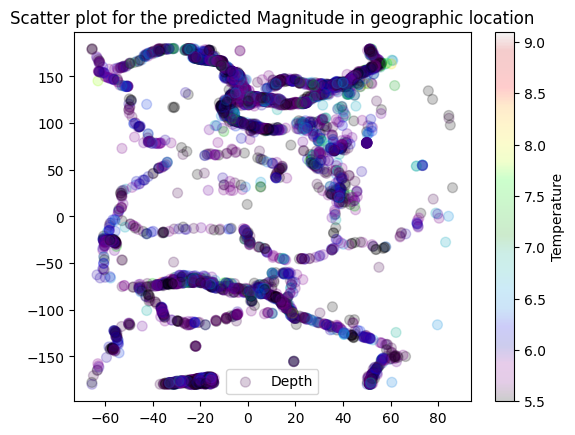

In [145]:
# Scatter plot for predicted temperature in geographic location
plt.scatter(test['Latitude'],test['Longitude'], c= predD,s  = 50, alpha=0.2,label = 'Depth', cmap = 'nipy_spectral' );
plt.title("Scatter plot for the predicted Magnitude in geographic location")
plt.legend()
plt.colorbar(label = 'Temperature')
plt.savefig("output/Scatter_plot_predicted_Magnitude_geographic_location.png")
plt.show()

In [146]:
# create a csv file with the predicted temperature and geographic location
map_= pd.DataFrame({"lat": test["Latitude"],
                   "lon": test["Longitude"],
                   "Magnitude": pred})

map_.to_csv("Map.CSV", index = False)

# Now, the Map.CSV file will be converted into map.shp file by the QGIS software

In [147]:
# Python package for GIS (geographic Information System) application
import geopandas as gpd

In [148]:
# Importing data of the world and map.shp as the geographic vector file format
world = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")


map0 = gpd.read_file("map.shp")


# Checking if the projection of that two data set is the same, if not same they will not overlay and projection need to set to equal
map0.crs==world.crs

True

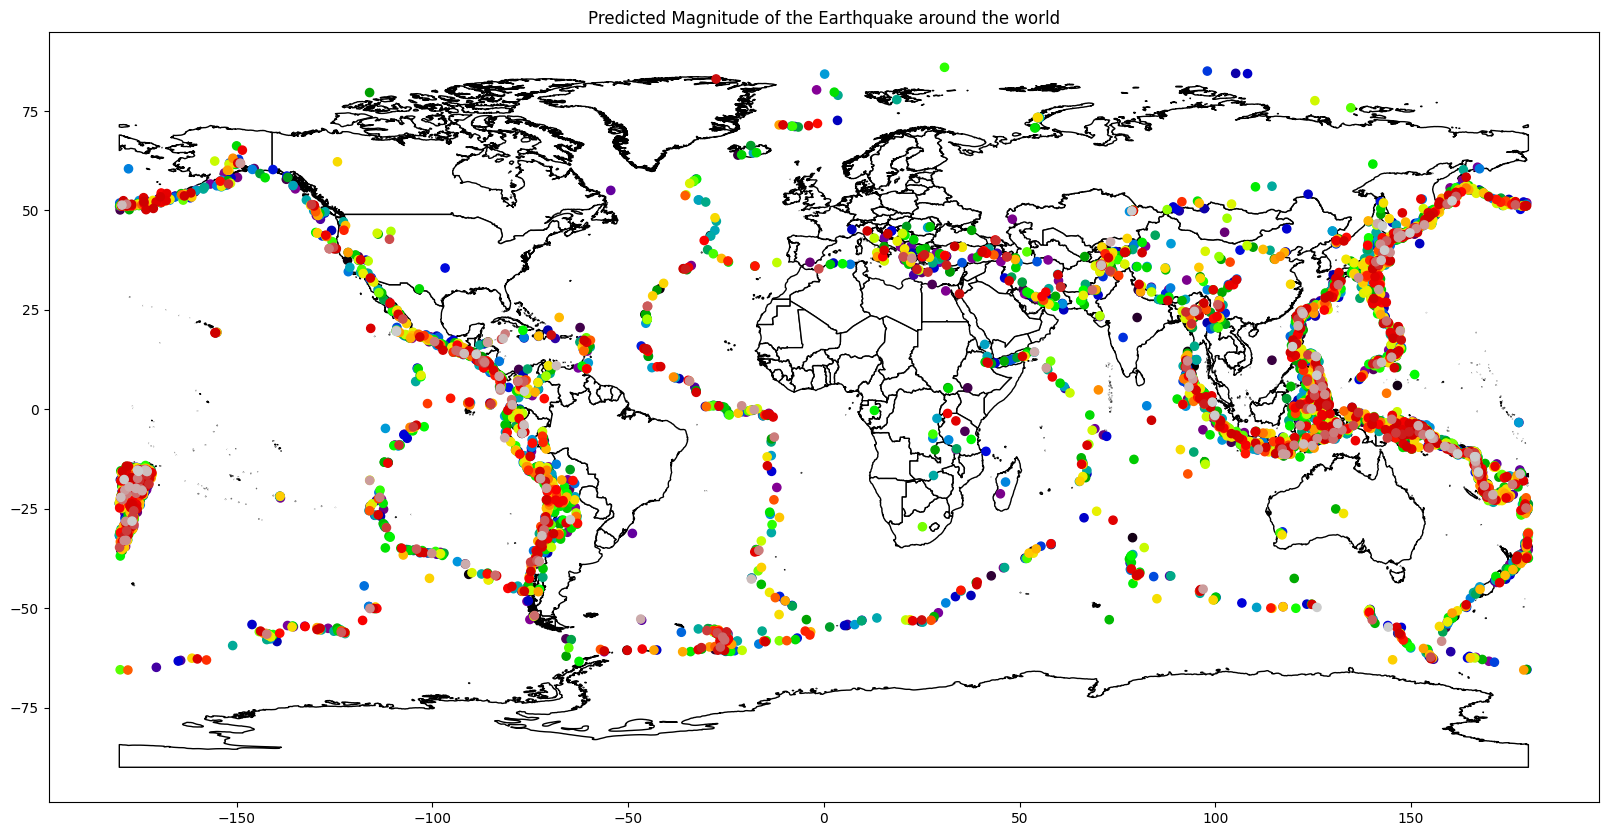

In [150]:
# Plotting the map for the predicted temperature
fig, ax = plt.subplots(figsize = (20,15))


world.plot(ax=ax, color='white', edgecolor='black')

map0.plot(ax=ax, marker = 'o',cmap = 'nipy_spectral', markersize = 35)

plt.title("Predicted Magnitude of the Earthquake around the world")


plt.savefig("output/Map_predicted_Magnitude.png")
plt.show()